# Algorithm benchmarking

In [2]:
# If pydistsim is not installed and the script is run from docs/notebooks directory
# import sys
# sys.path.append("../../")

from pydistsim.logger import set_log_level, enable_logger
from pydistsim.benchmark import AlgorithmBenchmark
from pydistsim.demo_algorithms.broadcast import Flood
from pydistsim.network.behavior import ExampleProperties

In [3]:
set_log_level("INFO")
enable_logger()

### Set-up the benchmark

- Pass algorithm, network sizes to test and the network behavior.
- Then run the benchmark.

In [4]:
benchmark = AlgorithmBenchmark(
    ((Flood, {"initial_information": "Hello Wold!"}),),
    network_sizes=range(1, 20),
    network_behavior=ExampleProperties.UnorderedRandomDelayCommunication,
)

benchmark.run()

### Automatically generated plots with the results

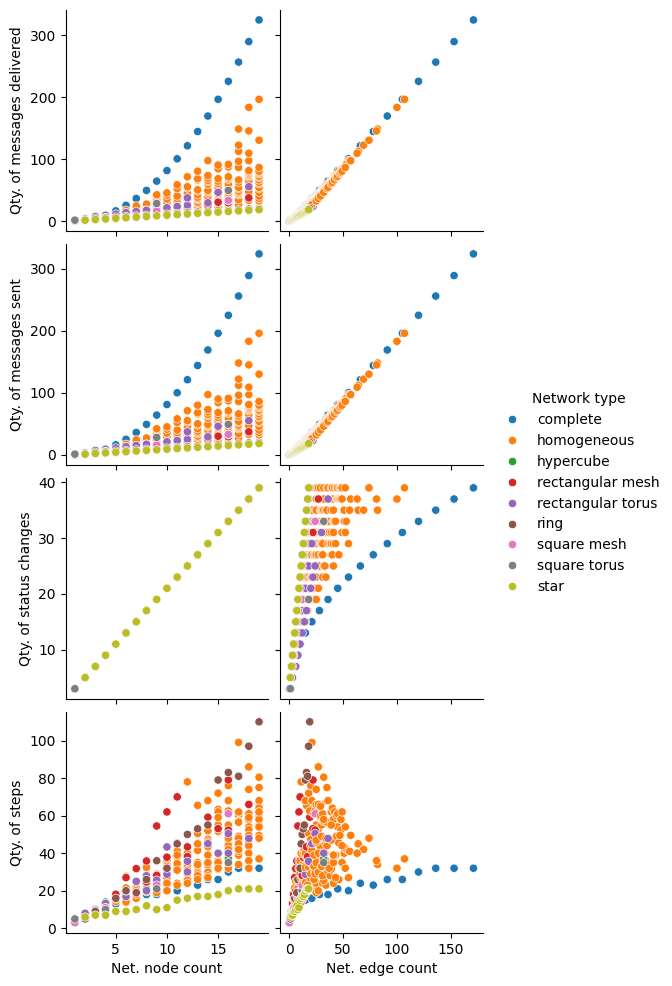

In [5]:
benchmark.plot_analysis()  # In IPython, this will plot the results

### Get the data as a pandas DataFrame for in-depth analysis

In [6]:
df = benchmark.get_results_dataframe()  # Get the results as a pandas DataFrame
df

,Net. node count,Net. edge count,Network type,Qty. of messages sent,Qty. of messages delivered,Qty. of status changes,Qty. of steps
0,1,0,complete,0,1,3,3
1,1,0,hypercube,0,1,3,3
2,1,0,ring,0,1,3,3
3,1,0,square mesh,0,1,3,3
4,1,1,square torus,1,2,3,5
...,...,...,...,...,...,...,...
1204,16,24,rectangular mesh,33,34,33,42
1205,18,36,rectangular torus,55,56,37,56
1206,19,39,homogeneous,60,61,39,55
1207,18,27,rectangular mesh,37,38,37,73
